In [ ]:
# ignore pandas future warnings about using pd.append()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
home_dir = Path('/content/drive/MyDrive/266 Final Project/Code')
train_path = home_dir / 'data' / 'train'
val_path = home_dir / 'data' / 'val'
test_path = home_dir / 'data' / 'test'

In [ ]:
def get_data(category):

    # combine seeker_post and response_post into one feature
    X_train = pd.read_csv(train_path / f'X_{category}.csv', delimiter=',')
    X_train = X_train['seeker_post'] + ' ' + X_train['response_post']
    # X_train = X_train.apply(lambda x: x.lower())
    # X_train = X_train.apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x))

    X_val = pd.read_csv(val_path / f'X_{category}.csv', delimiter=',')
    X_val = X_val['seeker_post'] + ' ' + X_val['response_post']
    # X_val = X_val.apply(lambda x: x.lower())
    # X_val = X_val.apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x))

    # get empathy flag
    y_train = pd.read_csv((train_path / f'y_{category}.csv'), delimiter=',')
    y_val = pd.read_csv((val_path / f'y_{category}.csv'), delimiter=',')

    y_train = y_train['empathy']
    y_val = y_val['empathy']

    return X_train, X_val, y_train, y_val

def naive_bayes(X_train, X_val, y_train):

    # strip punctuation and convert data to bag of words
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_val_vectorized = vectorizer.transform(X_val)

    # train multinomial naive bayes classifier
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train_vectorized, y_train)

    # make predictions
    y_pred = nb_classifier.predict(X_val_vectorized)

    return y_pred

def get_metrics(category, y_test, y_pred):

    # get metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy: {accuracy}")

    recall = recall_score(y_test, y_pred)
    print(f"recall: {recall}")

    precision = precision_score(y_test, y_pred)
    print(f"precision: {precision}")

    f1 = f1_score(y_test, y_pred)
    print(f"f1 score: {f1}")

    # get confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    sns.set(font_scale=1.2)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    metrics = {
        'Category': category,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    metrics_columns = ['Category', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    metrics = pd.DataFrame([metrics], columns=metrics_columns)

    return metrics

Running Naive Bayes on Emotional Reactions Dataset
accuracy: 0.6706443914081146
recall: 0.821917808219178
precision: 0.6451612903225806
f1 score: 0.7228915662650601
[[101  99]
 [ 39 180]]


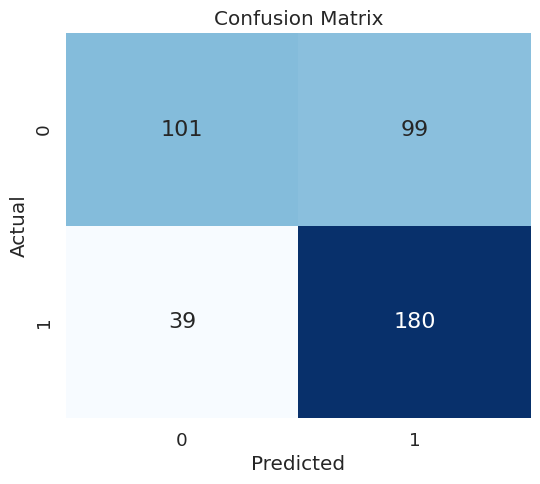

In [ ]:
print("Running Naive Bayes on Emotional Reactions Dataset")
category = 'em'
X_train, X_val, y_train, y_val = get_data(category)
y_pred = naive_bayes(X_train, X_val, y_train)
em_metrics = get_metrics(category, y_val, y_pred)

Running Naive Bayes on Interpretations Dataset
accuracy: 0.6645056726094003
recall: 0.7380952380952381
precision: 0.6253602305475504
f1 score: 0.6770670826833073
[[193 130]
 [ 77 217]]


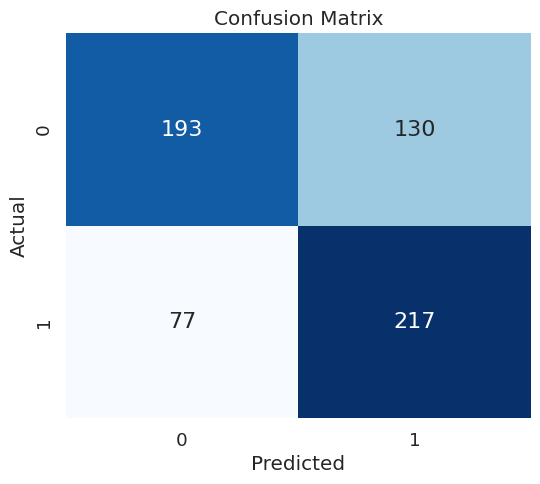

In [ ]:
print("Running Naive Bayes on Interpretations Dataset")
category = 'in'
X_train, X_val, y_train, y_val = get_data(category)
y_pred = naive_bayes(X_train, X_val, y_train)
in_metrics = get_metrics(category, y_val, y_pred)

Running Naive Bayes on Explorations Reactions Dataset
accuracy: 0.671875
recall: 0.6736842105263158
precision: 0.6666666666666666
f1 score: 0.6701570680628272
[[65 32]
 [31 64]]


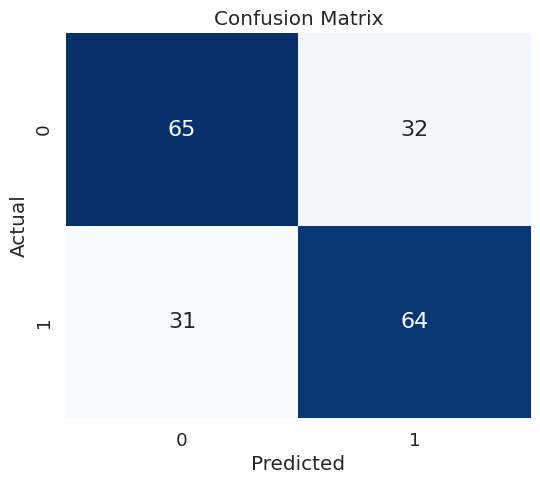

In [ ]:
print("Running Naive Bayes on Explorations Reactions Dataset")
category = 'ex'
X_train, X_val, y_train, y_val = get_data(category)
y_pred = naive_bayes(X_train, X_val, y_train)
ex_metrics = get_metrics(category, y_val, y_pred)

Running Naive Bayes on Explorations Augmented Reactions Dataset
accuracy: 0.7073170731707317
recall: 0.7411764705882353
precision: 0.7078651685393258
f1 score: 0.7241379310344828
[[106  52]
 [ 44 126]]


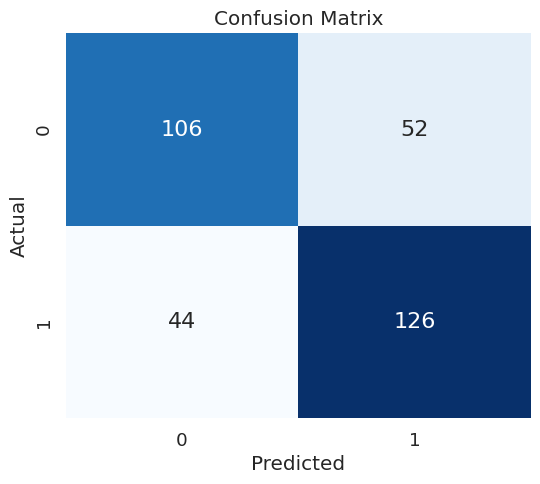

In [ ]:
## we ran this after completing our baseline/etc just to see!
print("Running Naive Bayes on Explorations Augmented Reactions Dataset")
category = 'ex_aug'
X_train, X_val, y_train, y_val = get_data(category)
y_pred = naive_bayes(X_train, X_val, y_train)
ex_aug_metrics = get_metrics(category, y_val, y_pred)

In [ ]:
metrics = pd.concat([em_metrics, in_metrics, ex_metrics, ex_aug_metrics], ignore_index=True)
display(metrics)

,Category,Accuracy,Precision,Recall,F1 Score
0,em,0.670644,0.645161,0.821918,0.722892
1,in,0.664506,0.625360,0.738095,0.677067
2,ex,0.671875,0.666667,0.673684,0.670157
3,ex_aug,0.707317,0.707865,0.741176,0.724138
